# Naive Bayes Text Classification

### Sentence Classification using Naive Bayes Algorithm

We made a simple Algorithm to try and classify senteces into either Sports or Not Sports sentences.
We start with a couple sentences either classed "Sports" or "Not Sports" and try to classify new sentences based on that.
At the end we make a comparison, which class ("Sports" or "Not Sports") the new sentence is more likely to end up in.

## Copyright

This Jupyter Notebook was primarily created as solution to an exercise in the lectute "Introduction to Machine Learning" (Dr. Hermann Völlinger), DHBW Stuttgart, WS 2020
The first version was created by the two students Alireza Gholami and Jannik Schwarz in October 2020 
Later versions are extended and completetd by Dr. Hermann Völlinger 
Actual version see saving date of the notebook

## Machine Learnig (ML) Model / Method

Important for a ML solution is the algorithm which is used for our solution.
In this example we use the algorithm we learned in the lecture: "Sentence Classification" using 
"Naive Bayes Algorithm"

For more information see the slides: "Homework_H3.2-Bayes_Learning_for_Text_Classification-Folien.pdf"


## What happens here:

    1. Import the Sklearn libraries which we need
    2. Provide training data and do transformations.
    3. Create dictionaries and count the words in each class.
    4. Calculate probabilities of the words.
    
To evaluate a new sentence...

    5. Vectorize and transform all sentences
    6. Count all words
    7. Transform new sentence
    8. Perform Laplace Smoothing, so we don't multiply with 0
    9. Calculate probability of the new sentence for each class
    10. Output whats more likely

In [1]:
# This notebook was created by Alireza Gholami and Jannik Schwarz

print('***********************************************************************')
print('This Jupyter Notebook was primarily created as solution to an exercise ') 
print('in the lecture: "Introduction to Machine Learning"(Dr. Hermann Völlinger)')
print('DHBW Stuttgart, WS 2020. First version was created by Alireza Gholami ')
print('and Jannik Schwarz in October 2020. Later versions are extended by Dr.')
print('Hermann Völlinger, see actual date of notebook ')
print('*************************************************************************')
print('Method: "Sentence classification" using "Naive Bayes Algorithm", see the ') 
print('slides: "Homework_H3.2-Bayes_Learning_for_Text_Classification-Folien.pdf"')
print('*************************************************************************')

# Importing everything we need
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize
from IPython.display import display, Math, Latex

# Import libary time to check execution date+time
import time


# print the date & time of the notebook
print('************************************************************************')
print("Actual date & time of the notebook:",time.strftime("%d.%m.%Y  %H:%M:%S")) 
print('************************************************************************')

#check versions of libraries
print('pandas version is: {}'.format(pd.__version__))    

import sklearn    
print('sklearn version is: {}'.format(sklearn.__version__)) 

import nltk    
print('nltk version is: {}'.format(nltk.__version__)) 

import IPython    
print('IPython version is: {}'.format(IPython.__version__)) 

***********************************************************************
This Jupyter Notebook was primarily created as solution to an exercise 
in the lecture: "Introduction to Machine Learning"(Dr. Hermann Völlinger)
DHBW Stuttgart, WS 2020. First version was created by Alireza Gholami 
and Jannik Schwarz in October 2020. Later versions are extended by Dr.
Hermann Völlinger, see actual date of notebook 
*************************************************************************
Method: "Sentence classification" using "Naive Bayes Algorithm", see the 
slides: "Homework_H3.2-Bayes_Learning_for_Text_Classification-Folien.pdf"
*************************************************************************
************************************************************************
Actual date & time of the notebook: 13.12.2022  18:35:22
************************************************************************
pandas version is: 1.0.1
sklearn version is: 0.22.1
nltk version is: 3.4.5
IPython version is

In [2]:
# Naming the two columns of the matrix
columns = ['sentence', 'class']

# Our training data consists of six labeled sentences
rows = [['A great game', 'Sports'],
        ['The election was over', 'Not Sports'],
        ['Very clean match', 'Sports'],
        ['A clean but forgettable game', 'Sports'],
        ['It was a close election', 'Not Sports'],
        ['A very close game', 'Sports']]

# we define a dataframe structure for the training data
# we use the Dataframe structure of the pandas library
training_data = pd.DataFrame(rows, columns=columns)
print(f'The training data consists of the six labeled sentences:\n{training_data}\n')

The training data consists of the six labeled sentences:
                       sentence       class
0                  A great game      Sports
1         The election was over  Not Sports
2              Very clean match      Sports
3  A clean but forgettable game      Sports
4       It was a close election  Not Sports
5             A very close game      Sports



In [3]:
# Turns the training data senteneces into vectors 

def vectorisation(my_class):
    
# my_docs contains the sentences for a class (sports or not sports)
    my_docs = [row['sentence'] for index, row in training_data.iterrows() if row['class'] == my_class]
# CountVectorizer count the words in each vector, stopword like "the" are omitted 
# creates a vector that counts the occurence of words in a sentence
    my_vector = CountVectorizer(token_pattern=r"(?u)\b\w+\b") # Token-Pattern damit einstellige Wörter wie 'a' gelesen werden
    
    # transform the sentences
    my_x = my_vector.fit_transform(my_docs)
    
    # tdm = term_document_matrix_sport | create the matrix with the vectors for a class
    tdm = pd.DataFrame(my_x.toarray(), columns=my_vector.get_feature_names())
    return tdm, my_vector, my_x

In [4]:
# Here we are actually creating the matrix for sport and not sport sentences
tdm_sport, vector_sport, X_sport = vectorisation('Sports')
tdm_not_sport, vector_not_sport, X_not_sport = vectorisation('Not Sports')

print(f'Sport sentence matrix: \n{tdm_sport}\n')
print(f'Not sport sentence matrix: \n{tdm_not_sport}\n')
print(f'Amount of sport sentences: {len(tdm_sport)}')
print(f'Amount of not sport senteces: {len(tdm_not_sport)}')
print(f'Total amount of sentences: {len(rows)}')

Sport sentence matrix: 
   a  but  clean  close  forgettable  game  great  match  very
0  1    0      0      0            0     1      1      0     0
1  0    0      1      0            0     0      0      1     1
2  1    1      1      0            1     1      0      0     0
3  1    0      0      1            0     1      0      0     1

Not sport sentence matrix: 
   a  close  election  it  over  the  was
0  0      0         1   0     1    1    1
1  1      1         1   1     0    0    1

Amount of sport sentences: 4
Amount of not sport senteces: 2
Total amount of sentences: 6


In [5]:
# creates a dictionary for each class
def make_list(my_vector, my_x):
    my_word_list = my_vector.get_feature_names()
    my_count_list = my_x.toarray().sum(axis=0)
    my_freq = dict(zip(my_word_list, my_count_list))
    return my_word_list, my_count_list, my_freq


In [6]:
# create lists

# word_list_sport = word list ['a', 'but', 'clean', 'forgettable', 'game', 'great', 'match', 'very']
# count_list_sport = occurence of words [2 1 2 1 2 1 1 1]
# freq_sport = combining the two to create a dictionary
word_list_sport, count_list_sport, freq_sport = make_list(vector_sport, X_sport)
word_list_not_sport, count_list_not_sport, freq_not_sport = make_list(vector_not_sport, X_not_sport)

print(f'sport dictionary: \n{freq_sport}\n')
print(f'not sport dictionary: \n{freq_not_sport}\n')

sport dictionary: 
{'a': 3, 'but': 1, 'clean': 2, 'close': 1, 'forgettable': 1, 'game': 3, 'great': 1, 'match': 1, 'very': 2}

not sport dictionary: 
{'a': 1, 'close': 1, 'election': 2, 'it': 1, 'over': 1, 'the': 1, 'was': 2}



### Calculating Probabilities: 
The final step is just to calculate every probability and see which one turns out to be larger. Calculating a probability is just counting in our training data. First, we calculate the a priori probability of each tag: for a given sentence in our training data, the probability that it is Sports = P(Sports)=3/5. Then, P(Not Sports)= 2/5. That’s easy enough.
Then, calculating  P(game|Sports)  means counting how many times the word “game” appears in Sports texts (2) divided by the total number of words in sports (11). Therefore, P(game|Sports)=2/11.  
However, we run into a problem here: “close” doesn’t appear in any Sports text! That means that P(close|Sports)=0. This is rather inconvenient since we are going to be multiplying it with the other probabilities, so we’ll end up with zero.        

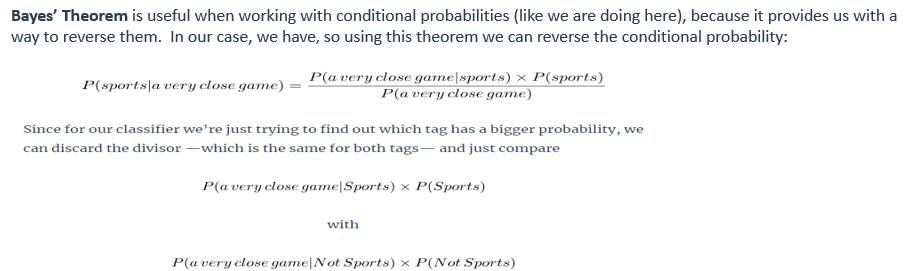

In [7]:
from IPython.display import Image
Image('Images/Bayes-Rule01.jpg')


In [8]:
# calculate the probabilty of a word in a sentence of a class
def calculate_prob(my_word_list, my_count_list):
    my_prob = []
    for my_word, my_count in zip(my_word_list, my_count_list):
        my_prob.append(my_count / len(my_word_list))
    prob_dict = dict(zip(my_word_list, my_prob))
    return prob_dict

In [9]:
# probabilities of the words in a class
prob_sport_dict = calculate_prob(word_list_sport, count_list_sport)
prob_not_sport_dict = calculate_prob(word_list_not_sport, count_list_not_sport)
print(f'probabilites of words in sport sentences: \n{prob_sport_dict}\n')
print(f'probabilites of words in not sport sentences: \n{prob_not_sport_dict}')

probabilites of words in sport sentences: 
{'a': 0.3333333333333333, 'but': 0.1111111111111111, 'clean': 0.2222222222222222, 'close': 0.1111111111111111, 'forgettable': 0.1111111111111111, 'game': 0.3333333333333333, 'great': 0.1111111111111111, 'match': 0.1111111111111111, 'very': 0.2222222222222222}

probabilites of words in not sport sentences: 
{'a': 0.14285714285714285, 'close': 0.14285714285714285, 'election': 0.2857142857142857, 'it': 0.14285714285714285, 'over': 0.14285714285714285, 'the': 0.14285714285714285, 'was': 0.2857142857142857}


In [10]:
# all sentences again
docs = [row['sentence'] for index, row in training_data.iterrows()]

# vectorizer
vector = CountVectorizer(token_pattern=r"(?u)\b\w+\b")

# transform the sentences
X = vector.fit_transform(docs)

# counting the words
total_features = len(vector.get_feature_names())
total_counts_features_sport = count_list_sport.sum(axis=0)
total_counts_features_not_sport = count_list_not_sport.sum(axis=0)
                     
print(f'Amount of distinct words: {total_features}')
print(f'Amount of distinct words in sport sentences: {total_counts_features_sport}')
print(f'Amount of distinct words in not sport sentences: {total_counts_features_not_sport}')

Amount of distinct words: 14
Amount of distinct words in sport sentences: 15
Amount of distinct words in not sport sentences: 9


In [11]:
# this is our test sentence, which we want to classify
# we call it new_sentence

new_sentence = 'Hermann plays a TT match'

# gets tokenized
new_word_list = word_tokenize(new_sentence)

### Laplace Smoothing
How do we do it? By using something called Laplace smoothing: we add 1 to every count so it’s never zero. To balance this, we add the number of possible words to the divisor, so the division will never be greater than 1. In our case, the possible words are (see notespage): [
'a', 'great', 'very', 'over', 'it', 'but', 'game', 'election', 'clean', 'close', 'the', 'was', 'forgettable', 'match'].
Since the number of possible words is 14 (I counted them!), applying smoothing we get that   P(game|Sports)=(2+1)/(11+14)=3/25



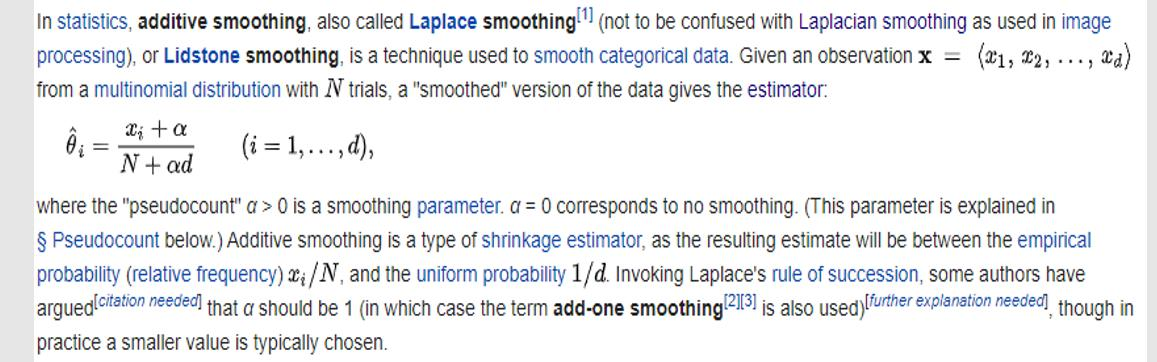

In [12]:
from IPython.display import Image
Image('Images/Bayes-Rule02.jpg')


In [13]:
# We're using laplace smoothing (this is a fun). laplace() is a function of the sklearn Library
# if a new word occurs the probability would be 0
# So every word counter gets incremented by one

def laplace(freq, total_count, total_feat):
    prob_sport_or_not = []
    for my_word in new_word_list:
        if my_word in freq.keys():
            counter = freq[my_word]
        else:
            counter = 0
        # total_count is the amount of words in sport sentences and total_feat the total amount of words
        prob_sport_or_not.append((counter + 1) / (total_count + total_feat))
    return prob_sport_or_not

In [14]:
# probability for the new words
prob_new_sport = laplace(freq_sport, total_counts_features_sport, total_features)
prob_new_not_sport = laplace(freq_not_sport, total_counts_features_not_sport, total_features)

print(f'probability that the word is in a sport sentece: {prob_new_sport}')
print(f'probability that the word is in a not sport sentece: {prob_new_not_sport}')

probability that the word is in a sport sentece: [0.034482758620689655, 0.034482758620689655, 0.13793103448275862, 0.034482758620689655, 0.06896551724137931]
probability that the word is in a not sport sentece: [0.043478260869565216, 0.043478260869565216, 0.08695652173913043, 0.043478260869565216, 0.043478260869565216]


In [15]:
# multiplying the probabilities of each word
new_sport = list(prob_new_sport)
sport_multiply_result = 1
for i in range(0, len(new_sport)):
    sport_multiply_result *= new_sport[i]

# multiplying the result with the ratio of sports senteces to the total amount of sentences (here its 4/6)
sport_multiply_result *= ( len(tdm_sport) / len(rows) )

# multiplying the probabilities of each word   
new_not_sport = list(prob_new_not_sport)
not_sport_multiply_result = 1
for i in range(0, len(new_not_sport)):
    not_sport_multiply_result *= new_not_sport[i]
    
# multiplying the result with the ratio of sports senteces to the total amount of sentences (here its 2/6)
not_sport_multiply_result *= ( len(tdm_not_sport) / len(rows) )
    
    

In [16]:
# comparing whats more likely 

print(f'The probability of the sentence "{new_sentence}":\nSport vs not sport\n{sport_multiply_result} vs {not_sport_multiply_result}\n\n')

if not_sport_multiply_result < sport_multiply_result:
    print('Verdict: It\'s probably a sports sentence!')
else:
    print('Verdict: It\'s probably not a sport sentence!')

The probability of the sentence "Hermann plays a TT match":
Sport vs not sport
2.6002118815154297e-07 vs 1.0357848652047699e-07


Verdict: It's probably a sports sentence!


In [17]:
# print current date and time

print("Date & Time:",time.strftime("%d.%m.%Y  %H:%M:%S"))
# end of import test
print ("*** End of Homework-H3.2_Bayes-Learning... ***")

Date & Time: 13.12.2022  18:35:22
*** End of Homework-H3.2_Bayes-Learning... ***
